# Anomaly detection on CPU usage

You will put on practice a lot of skills and your time series new knowledge to try improving a default prediction model.
You can use the resources provided in the course, Arima method, Prophet method, and of course continue looking for additional resources if you wish to have a different approach to the problem.


# Task -  

- Anomaly Detection means to identify unexpected events in a process. It means to detect threats to our systems that may cause harm in terms of security and leakage of important information, but the importance of Anomaly Detection is not limited to security. 
- The data of this project is based on per-minute metrics of the host’s CPU utilization.

In [2]:
%%capture
%pip install fbprophet
%pip install prophet
%pip install pystan==2.19.1.1 prophet
%pip install --upgrade plotly

In [3]:
%%capture
%pip install pmdarima

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [5]:
from prophet import Prophet
from prophet.plot import plot_plotly

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [6]:
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_a.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

Tenemos una columna y un index

In [7]:
# tenemos una columna y un indice

In [8]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_b.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [9]:
data_train_a.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2017-01-27 18:42:00 to 2017-01-28 01:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


Vamos a resetear el índice

In [10]:
data_train_a.reset_index(inplace=True)

In [11]:
data_train_a.head()
# quedo todo en una columna

datetime   cpu
0 2017-01-27 18:42:00  1.14
1 2017-01-27 18:43:00  1.10
2 2017-01-27 18:44:00  1.09
3 2017-01-27 18:45:00  1.08
4 2017-01-27 18:46:00  1.08

Vamos a hacer a renombrar las columnas, porque la librería requiere determinado nombre, DS y Y, sino da error


In [12]:
data_train_a.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [13]:
# hacemos el fit del modelo
m = Prophet()
m.fit(data_train_a)

00:20:44 - cmdstanpy - INFO - Chain [1] start processing
00:20:44 - cmdstanpy - INFO - Chain [1] done processing


ponemos como base 1 día segundos para hacer las predicciones. 

In [14]:
future = m.make_future_dataframe(periods=1)
future.tail()

ds
416 2017-01-28 01:38:00
417 2017-01-28 01:39:00
418 2017-01-28 01:40:00
419 2017-01-28 01:41:00
420 2017-01-29 01:41:00

In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
416 2017-01-28 01:38:00   2.034758    1.545940    2.548028
417 2017-01-28 01:39:00   2.043367    1.517970    2.524302
418 2017-01-28 01:40:00   2.051975    1.519922    2.548966
419 2017-01-28 01:41:00   2.060584    1.511102    2.579836
420 2017-01-29 01:41:00  14.456898   10.159074   19.130589

00:20:51 - cmdstanpy - INFO - Chain [1] start processing
00:20:51 - cmdstanpy - INFO - Chain [1] done processing


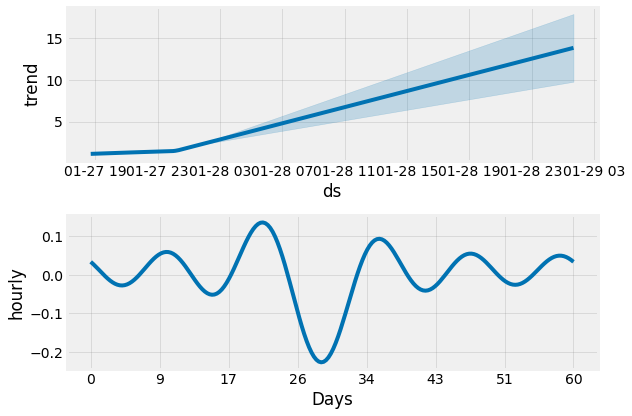

In [16]:
# Python
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = m.fit(data_train_a).predict(future)
fig = m.plot_components(forecast)

In [17]:
Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

00:20:56 - cmdstanpy - INFO - Chain [1] start processing
00:20:56 - cmdstanpy - INFO - Chain [1] done processing


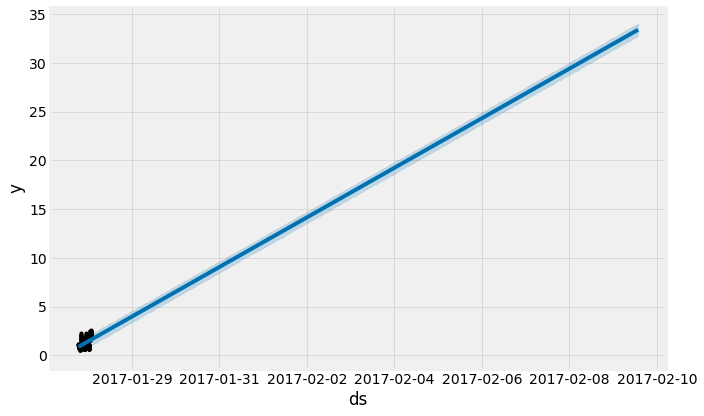

In [18]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_a)

future = m.make_future_dataframe(periods=300, freq='H')

fcst = m.predict(future)

fig = m.plot(fcst)

00:21:06 - cmdstanpy - INFO - Chain [1] start processing
00:21:06 - cmdstanpy - INFO - Chain [1] done processing


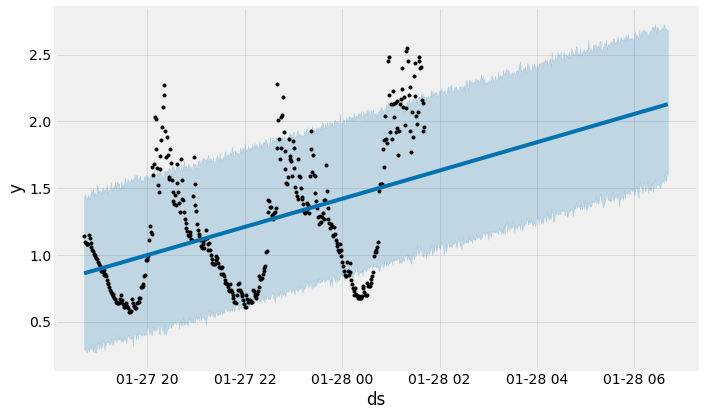

In [19]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_a)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

In [20]:
m=Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

m.fit(data_train_a)

00:21:09 - cmdstanpy - INFO - Chain [1] start processing
00:21:10 - cmdstanpy - INFO - Chain [1] done processing


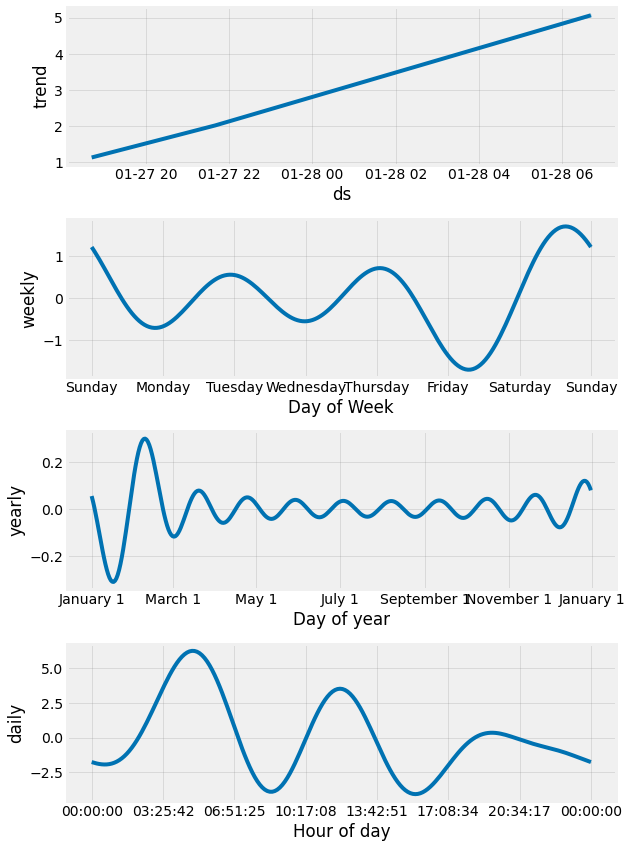

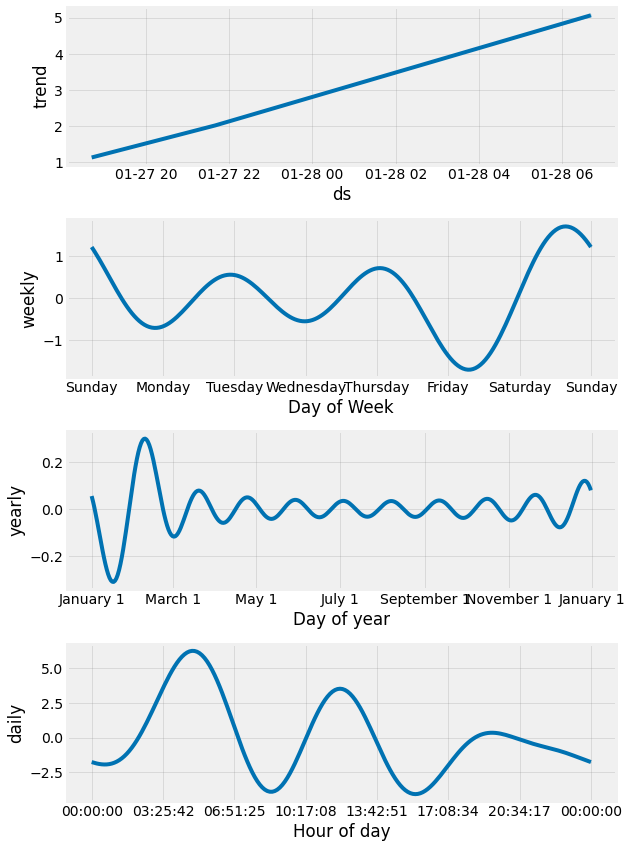

In [21]:
future = m.make_future_dataframe(periods=300, freq='1min')

fcst = m.predict(future)

m.plot_components(fcst)

Auto-Arima, prueba hasta encontrar el mejor modelo, basándose en la medida de error.

In [22]:
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)

In [23]:
data_train_a.index = pd.to_datetime(data_train_a.index)

In [24]:
from pmdarima.arima import auto_arima

In [25]:
data_train_a.index = pd.to_datetime(data_train_a.index)
data_train_b.index = pd.to_datetime(data_train_b.index)

In [26]:
#aic se puede ir cambiando- es un estimador estadístico de la calidad del modelo. Cuando menor es mejor.

from pmdarima.arima import auto_arima
stepwise_model_a = auto_arima(data_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_a.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.83 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=5.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=1.82 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.37 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=9.51 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=12.88 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=8.49 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=15.50 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-37

In [27]:
stepwise_model_a.fit(data_train_a)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

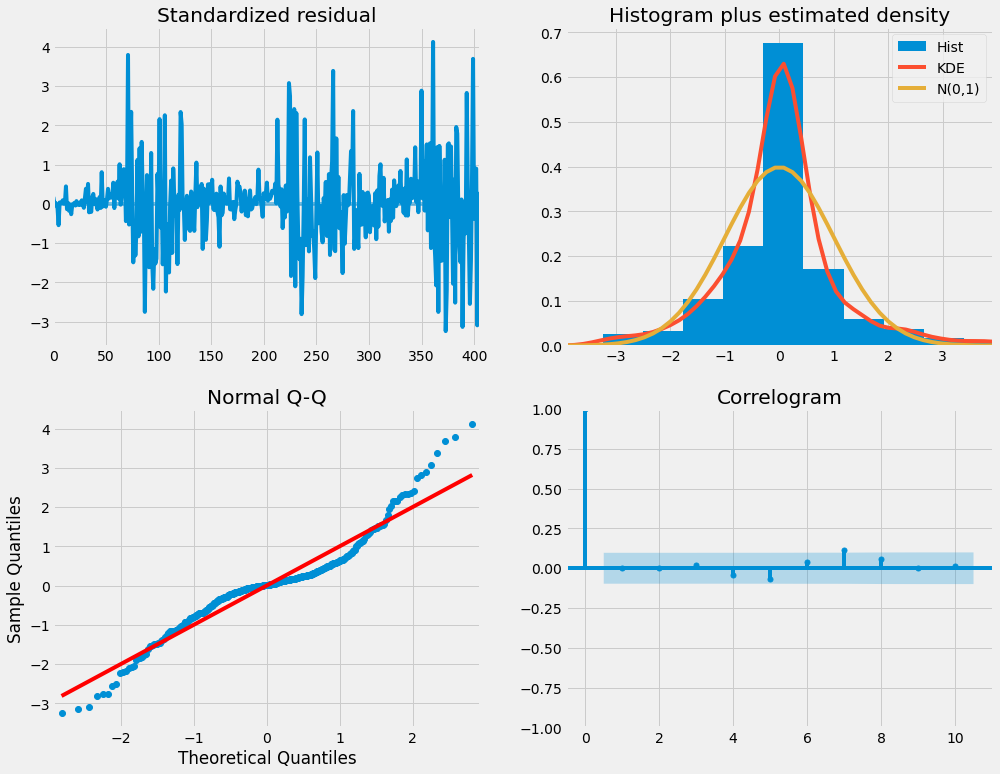

In [28]:
stepwise_model_a.fit(data_train_a).plot_diagnostics(figsize=(15, 12))
plt.show()

In [29]:
future_forecast = stepwise_model_a.predict(n_periods=60)

<AxesSubplot:xlabel='datetime'>

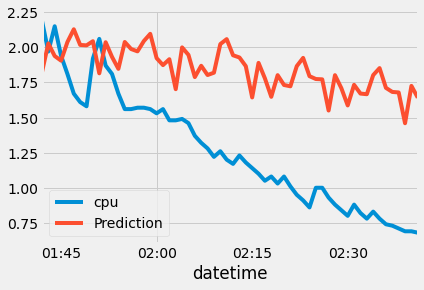

In [30]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_a.index,columns=['Prediction'])
pd.concat([data_test_a,future_forecast],axis=1).plot()

## Grabar modelo 

In [34]:
# Save the model as a pickle
import pickle
filename = '../models/best_model_a.pkl'
pickle.dump(stepwise_model_a, open(filename,'wb'))

In [ ]:
import _pickle as cPickle # Faster than pickle
#import pickle
import gzip

Repetir lo mismo con b

In [35]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_b.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [36]:
data_train_b.reset_index(inplace=True)

In [37]:
data_train_b.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [38]:
m = Prophet()
m.fit(data_train_b)

00:32:20 - cmdstanpy - INFO - Chain [1] start processing
00:32:20 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future = m.make_future_dataframe(periods=1)
future.tail()

ds
596 2017-01-28 04:38:00
597 2017-01-28 04:39:00
598 2017-01-28 04:40:00
599 2017-01-28 04:41:00
600 2017-01-29 04:41:00

In [40]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
596 2017-01-28 04:38:00  1.599602    1.005391    2.141577
597 2017-01-28 04:39:00  1.600650    1.011644    2.175955
598 2017-01-28 04:40:00  1.601698    1.027134    2.151364
599 2017-01-28 04:41:00  1.602746    0.996609    2.223952
600 2017-01-29 04:41:00  3.112259    2.534054    3.656109

00:32:27 - cmdstanpy - INFO - Chain [1] start processing
00:32:27 - cmdstanpy - INFO - Chain [1] done processing


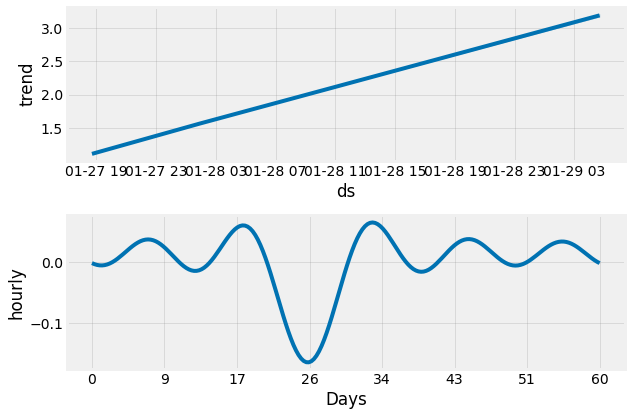

In [41]:
# Python
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = m.fit(data_train_b).predict(future)
fig = m.plot_components(forecast)

In [42]:
Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

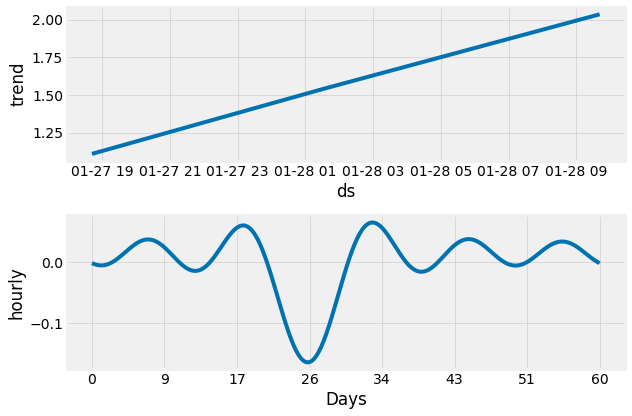

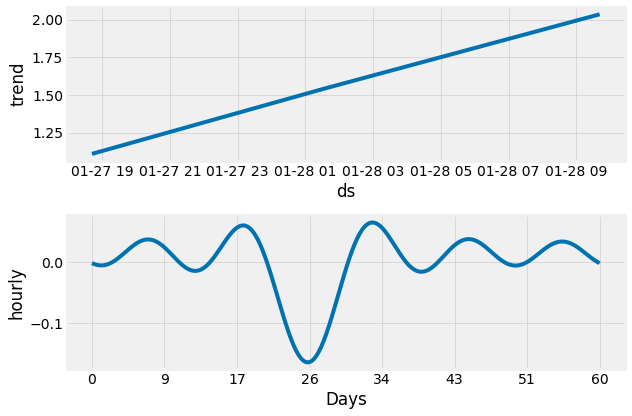

In [43]:
future = m.make_future_dataframe(periods=300, freq='1min')

fcst = m.predict(future)

m.plot_components(fcst)

00:32:37 - cmdstanpy - INFO - Chain [1] start processing
00:32:37 - cmdstanpy - INFO - Chain [1] done processing


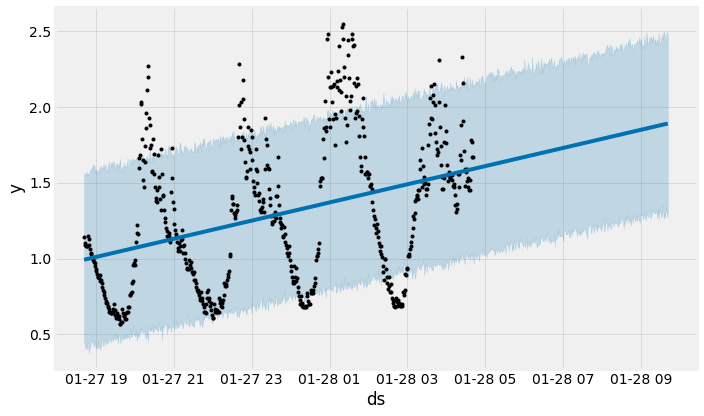

In [44]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_b)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

In [45]:
m=Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

m.fit(data_train_b)

00:32:41 - cmdstanpy - INFO - Chain [1] start processing
00:32:41 - cmdstanpy - INFO - Chain [1] done processing


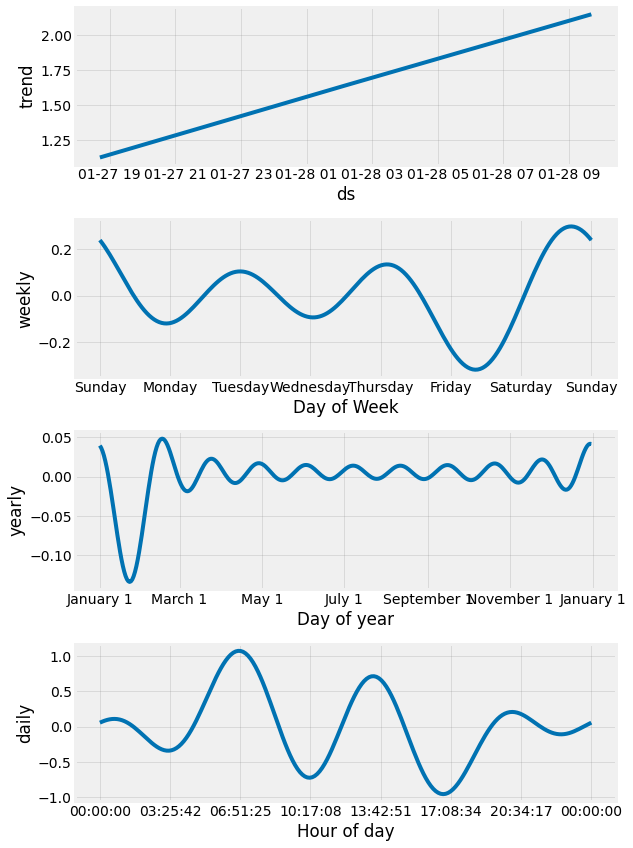

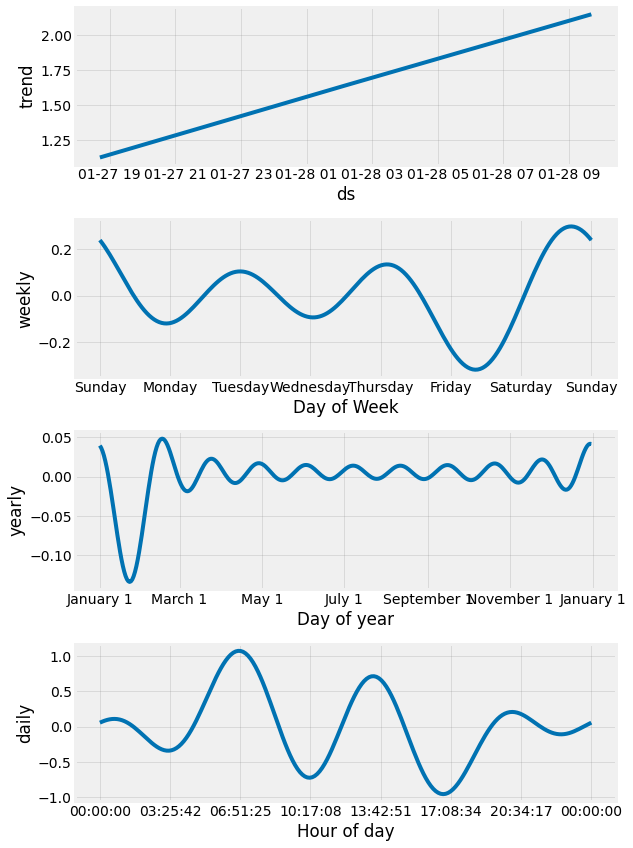

In [46]:
future = m.make_future_dataframe(periods=300, freq='1min')

fcst = m.predict(future)

m.plot_components(fcst)

In [47]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)

In [48]:
data_train_b.index = pd.to_datetime(data_train_b.index)

In [49]:
#aic se puede ir cambiando- es un estimador estadístico de la calidad del modelo. Cuando menor es mejor.

from pmdarima.arima import auto_arima
stepwise_model_b = auto_arima(data_train_b, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_b.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=6.82 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-376.973, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-540.238, Time=0.61 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-375.034, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-618.341, Time=2.69 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=17.79 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=6.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-619.706, Time=2.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-541.973, Time=0.40 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=11.49 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.11 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-618.493, Time=2.11 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=13.87 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-617.729

In [50]:
stepwise_model_b.fit(data_train_b)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

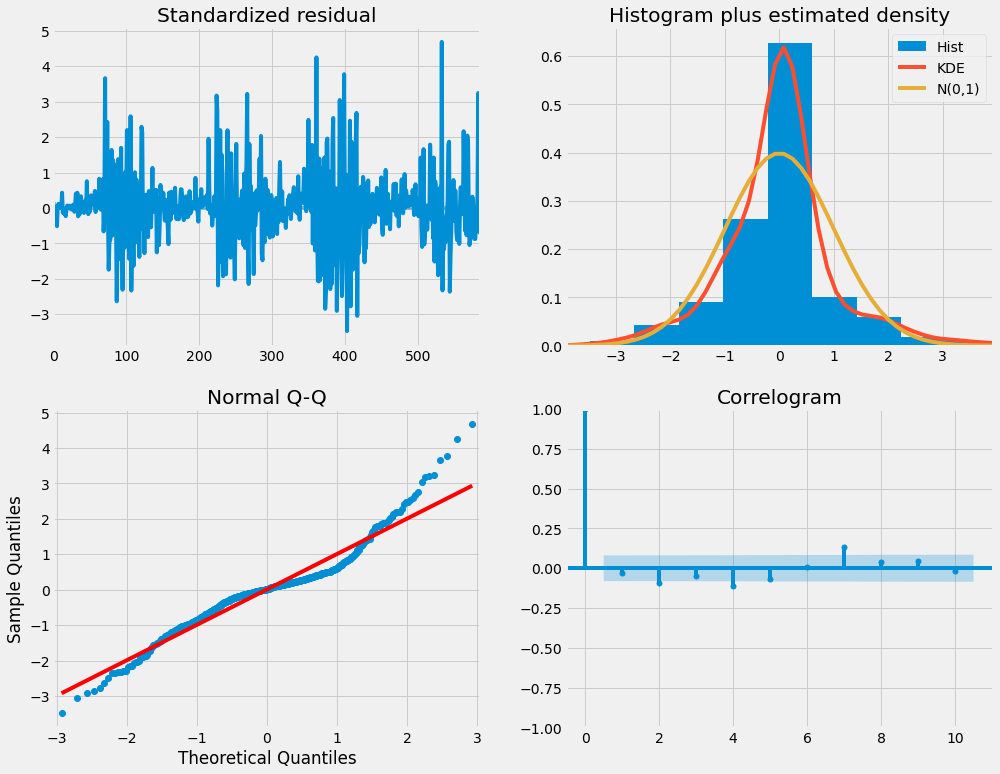

In [51]:
stepwise_model_b.fit(data_train_b).plot_diagnostics(figsize=(15, 12))
plt.show()

In [52]:
future_forecast = stepwise_model_b.predict(n_periods=60)

<AxesSubplot:xlabel='datetime'>

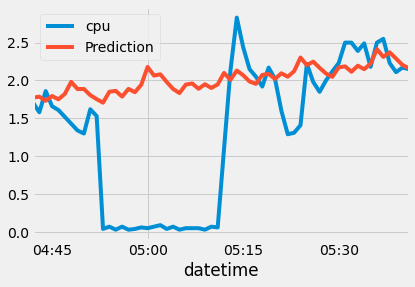

In [53]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_b.index,columns=['Prediction'])
pd.concat([data_test_b,future_forecast],axis=1).plot()

In [54]:
# Save the model as a pickle
filename = '../models/best_model_b.pkl'
pickle.dump(stepwise_model_b, open(filename,'wb'))


In [ ]:
#filename1 = '../models/best_model_b.pkl'
#def save(object, filename1, bin = 1):
#	"""Saves a compressed object to disk
#	"""
#	file1 = gzip.GzipFile(filename1, 'wb')
#	file1.write(cPickle.dump(stepwise_model_b, bin))
#	file1.close()


In [ ]:
#filename1 = '../models/best_model_b.pkl'

#def save(object, filename1, protocol = -1):
#    """Save an object to a compressed disk file.
#       Works well with huge objects.
#    """
#    file1 = gzip.GzipFile(filename1, 'wb')
#    cPickle.dump(stepwise_model_b, file, protocol)
#    file.close()